<h1>Financial Engineering</h1>
<h2 style = 'color:yellow'>1.1 Financial Basics</h2>
<h3 style = 'color:green'>1.1.0 Import Libraries</h3>

In [1]:
from IPython.display import display, HTML, Image
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import nasdaqdatalink
import os

import yfinance as yf
from glob import glob

<h3 style = 'color:green'>1.1.1 Loading and Understanding Data</h3>

In [2]:
nasdaqdatalink.ApiConfig.api_key = os.environ.get('NASDAQ_DATA_LINK_API_KEY') 
print(nasdaqdatalink.ApiConfig.api_key)  # Should print your API key

EtqBzjLodLUWWiYHtQZy


In [3]:
df = nasdaqdatalink.get_table('ZACKS/FC', ticker='AAPL')
df.head()

,m_ticker,ticker,comp_name,comp_name_2,exchange,currency_code,per_end_date,per_type,per_code,per_fisc_year,...,stock_based_compsn_qd,cash_flow_oper_activity_qd,net_change_prop_plant_equip_qd,comm_stock_div_paid_qd,pref_stock_div_paid_qd,tot_comm_pref_stock_div_qd,wavg_shares_out,wavg_shares_out_diluted,eps_basic_net,eps_diluted_net
None,,,,,,,,,,,,,,,,,,,,,
0,AAPL,AAPL,Apple,Apple Inc.,NASDAQ,USD,2018-12-31,Q,None,2019,...,1559.0,26690.0,-3355.0,-3568.0,None,-3568.0,18943.28,19093.01,1.0550,1.0450
1,AAPL,AAPL,Apple,Apple Inc.,NASDAQ,USD,2018-09-30,Q,None,2018,...,1345.0,19523.0,-3041.0,-3530.0,None,-3530.0,19821.51,20000.44,0.7425,0.7400
2,AAPL,AAPL,Apple,Apple Inc.,NASDAQ,USD,2018-06-30,Q,None,2018,...,1351.0,14488.0,-3267.0,-3653.0,None,-3653.0,19528.67,19706.44,0.5900,0.5850
3,AAPL,AAPL,Apple,Apple Inc.,NASDAQ,USD,2018-03-31,Q,None,2018,...,1348.0,15130.0,-4195.0,-3190.0,None,-3190.0,20099.51,20273.97,0.6875,0.6825
4,AAPL,AAPL,Apple,Apple Inc.,NASDAQ,USD,2018-09-30,A,None,2018,...,NaN,NaN,NaN,NaN,None,NaN,19821.51,20000.44,3.0000,2.9800


In [4]:
data = nasdaqdatalink.get_table('MER/F1', compnumber="39102", paginate=True)
data.head()

,compnumber,reportid,mapcode,amount,reportdate,reporttype,auditorstatus,currency,consolidated,longname,...,city,statecode,country,zipcode,phonenumber,faxnumber,website,fye,indicator,statement
None,,,,,,,,,,,,,,,,,,,,,
0,39102,1851368960,-9087,10.446851,2010-12-31,A,N,EUR,True,Nokia Corp,...,Espoo,None,FIN,Fl-02610,(358) 10 44 88 000,(358) 10 44 81 002,www.nokia.com,2023-12-31,Total Assets Per Share,Balance Sheet
1,39102,1851369024,-9087,10.446851,2010-12-31,Q4,N,EUR,True,Nokia Corp,...,Espoo,None,FIN,Fl-02610,(358) 10 44 88 000,(358) 10 44 81 002,www.nokia.com,2023-12-31,Total Assets Per Share,Balance Sheet
2,39102,1885110592,-1465,0.642525,2012-12-31,Q4,N,EUR,True,Nokia Corp,...,Espoo,None,FIN,Fl-02610,(358) 10 44 88 000,(358) 10 44 81 002,www.nokia.com,2023-12-31,Free Cash Flow Per Share,Derived
3,39102,1885110592,-5370,8.596581,2012-12-31,Q4,N,EUR,True,Nokia Corp,...,Espoo,None,FIN,Fl-02610,(358) 10 44 88 000,(358) 10 44 81 002,www.nokia.com,2023-12-31,Revenue Per Share,Income Statement
4,39102,1851368960,-1012,3.392546,2010-12-31,A,N,EUR,True,Nokia Corp,...,Espoo,None,FIN,Fl-02610,(358) 10 44 88 000,(358) 10 44 81 002,www.nokia.com,2023-12-31,EBITDA Margin,Derived


In [5]:
data = nasdaqdatalink.get_table('MER/F1',qopts={"columns":["compnumber", "ticker"]}, paginate=True)
data.head()

,compnumber,ticker
None,,
0,2438,DB
1,2438,DB
2,2438,DB
3,2438,DB
4,2438,DB


In [6]:
symbols = ['MMM','ABT','ABBV','ACN','ATVI','AYI','ADBE','AMD','AAP','AES','AET', 'AMG','AFL','A','APD','AKAM','ALK','ALB','ARE','ALXN','ALGN','ALLE', 'AGN','ADS','LNT','ALL','GOOGL','GOOG','MO','AMZN','AEE','AAL','AEP',
    'AXP','AIG','AMT','AWK','AMP','ABC','AME','AMGN','APH','APC','ADI','ANDV', 'ANSS','ANTM','AON','AOS','APA','AIV','AAPL','AMAT','APTV','ADM','ARNC', 'AJG','AIZ','T','ADSK','ADP','AZO','AVB','AVY','BHGE','BLL','BAC','BK',
    'BAX','BBT','BDX','BRK.B','BBY','BIIB','BLK','HRB','BA','BWA','BXP','BSX', 'BHF','BMY','AVGO','BF.B','CHRW','CA','COG','CDNS','CPB','COF','CAH','CBOE', 'KMX','CCL','CAT','CBG','CBS','CELG','CNC','CNP','CTL','CERN','CF','SCHW',
    'CHTR','CHK','CVX','CMG','CB','CHD','CI','XEC','CINF','CTAS','CSCO','C','CFG', 'CTXS','CLX','CME','CMS','KO','CTSH','CL','CMCSA','CMA','CAG','CXO','COP', 'ED','STZ','COO','GLW','COST','COTY','CCI','CSRA','CSX','CMI','CVS','DHI',
    'DHR','DRI','DVA','DE','DAL','XRAY','DVN','DLR','DFS','DISCA','DISCK','DISH', 'DG','DLTR','D','DOV','DWDP','DPS','DTE','DRE','DUK','DXC','ETFC','EMN','ETN',
    'EBAY','ECL','EIX','EW','EA','EMR','ETR','EVHC','EOG','EQT','EFX','EQIX','EQR', 'ESS','EL','ES','RE','EXC','EXPE','EXPD','ESRX','EXR','XOM','FFIV', 'FB','FAST',
    'FRT','FDX','FIS','FITB','FE','FISV','FLIR','FLS','FLR','FMC','FL','F','FTV', 'FBHS','BEN','FCX','GPS','GRMN','IT','GD','GE','GGP','GIS','GM','GPC','GILD', 'GPN','GS','GT','GWW','HAL','HBI','HOG','HRS','HIG','HAS',
    'HCA','HCP','HP','HSIC', 'HSY','HES','HPE','HLT','HOLX','HD','HON','HRL','HST','HPQ','HUM','HBAN','HII', 'IDXX','INFO','ITW','ILMN','IR','INTC','ICE','IBM','INCY','IP','IPG','IFF','INTU',
    'ISRG','IVZ','IQV','IRM','JEC','JBHT','SJM','JNJ','JCI','JPM','JNPR','KSU','K','KEY', 'KMB','KIM','KMI','KLAC','KSS','KHC','KR','LB','LLL','LH','LRCX','LEG','LEN','LUK',
    'LLY','LNC','LKQ','LMT','L','LOW','LYB','MTB','MAC','M','MRO','MPC','MAR','MMC','MLM', 'MAS','MA','MAT','MKC','MCD','MCK','MDT','MRK','MET','MTD','MGM','KORS','MCHP','MU',
    'MSFT','MAA','MHK','TAP','MDLZ','MON','MNST','MCO','MS','MOS','MSI','MYL','NDAQ', 'NOV','NAVI','NTAP','NFLX','NWL','NFX','NEM','NWSA','NWS','NEE','NLSN','NKE','NI',
    'NBL','JWN','NSC','NTRS','NOC','NCLH','NRG','NUE','NVDA','ORLY','OXY','OMC','OKE', 'ORCL','PCAR','PKG','PH','PDCO','PAYX','PYPL','PNR','PBCT','PEP','PKI','PRGO','PFE',
    'PCG','PM','PSX','PNW','PXD','PNC','RL','PPG','PPL','PX','PCLN','PFG','PG','PGR', 'PLD','PRU','PEG','PSA','PHM','PVH','QRVO','PWR','QCOM','DGX','RRC','RJF','RTN','O',
    'RHT','REG','REGN','RF','RSG','RMD','RHI','ROK','COL','ROP','ROST','RCL','CRM','SBAC', 'SCG','SLB','SNI','STX','SEE','SRE','SHW','SIG','SPG','SWKS','SLG','SNA','SO','LUV',
    'SPGI','SWK','SBUX','STT','SRCL','SYK','STI','SYMC','SYF','SNPS','SYY','TROW','TPR', 'TGT','TEL','FTI','TXN','TXT','TMO','TIF','TWX','TJX','TMK','TSS','TSCO','TDG','TRV',
    'TRIP','FOXA','FOX','TSN','UDR','ULTA','USB','UAA','UA','UNP','UAL','UNH','UPS','URI', 'UTX','UHS','UNM','VFC','VLO','VAR','VTR','VRSN','VRSK','VZ','VRTX','VIAB','V','VNO',
    'VMC','WMT','WBA','DIS','WM','WAT','WEC','WFC','HCN','WDC','WU','WRK','WY','WHR','WMB', 'WLTW','WYN','WYNN','XEL','XRX','XLNX','XL','XYL','YUM','ZBH','ZION','ZTS']

symbols.append('SPY')

In [7]:
for symbol in symbols:
    if not os.path.exists(f'../0. Data/{symbol}.csv'):
        data = yf.download(symbol, start="2021-01-01", end="2024-09-30")
        data.to_csv(f'../0. Data/{symbol}.csv')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Columns: 249 entries, m_ticker to eps_diluted_net
dtypes: datetime64[ns](7), float64(106), int64(10), object(126)
memory usage: 9.9+ KB


In [9]:
files = glob('../0. Data/*.csv')
error = []
full_df = None

for f in files:
    df = pd.read_csv(f)
    if df.shape[0] == 0:
        # print(f'Loaded {symbol} data with shape {df.shape}')
        pass
    else:
            
        # print(f'Loaded {symbol} data with shape {df.shape}')
        # Extract the ticker symbol from the file name
        try:
            symbol = os.path.splitext(os.path.basename(f))[0]  # Extract the ticker symbol
            if "5" in symbol:
                pass  # Skip the S&P 500 index file
            else:

                df['Symbol'] = symbol  
                

                # Example type conversions (adjust as needed)
                df['Date'] = pd.to_datetime(df['Date'])
                df['Close'] = pd.to_numeric(df['Close'])

                if full_df is None:
                    full_df = df
                else:
                    full_df = pd.concat([full_df, df], ignore_index=True)
                print(f'Last successfully Loaded {symbol} data with shape {df.shape}')
        except Exception as e:
            print(f'Error loading {symbol} data')
            error.append(f'{symbol}: {str(e)}')

full_df.to_csv('../0. Data/sp500full.csv', index=False)
print(f'Total loaded data shape: {full_df.shape}')
print(f'Errors encountered: {error}')

Last successfully Loaded A data with shape (940, 8)
Last successfully Loaded AAL data with shape (940, 8)
Last successfully Loaded AAP data with shape (940, 8)
Last successfully Loaded AAPL data with shape (940, 8)
Last successfully Loaded ABBV data with shape (940, 8)
Last successfully Loaded ABT data with shape (940, 8)
Last successfully Loaded ACN data with shape (940, 8)
Last successfully Loaded ADBE data with shape (940, 8)
Last successfully Loaded ADI data with shape (940, 8)
Last successfully Loaded ADM data with shape (940, 8)
Last successfully Loaded ADP data with shape (940, 8)
Last successfully Loaded ADSK data with shape (940, 8)
Last successfully Loaded AEE data with shape (940, 8)
Last successfully Loaded AEP data with shape (940, 8)
Last successfully Loaded AES data with shape (940, 8)
Last successfully Loaded AFL data with shape (940, 8)
Last successfully Loaded AIG data with shape (940, 8)
Last successfully Loaded AIV data with shape (940, 8)
Last successfully Loaded A

In [10]:
df = pd.read_csv('../0. Data/sp500full.csv')
df.shape

(403057, 8)

In [11]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Symbol
0,2021-01-04,118.940002,120.089996,117.110001,118.639999,115.796394,2030700,A
1,2021-01-05,118.480003,120.320000,118.070000,119.610001,116.743149,2344000,A
2,2021-01-06,118.690002,123.879997,118.209999,122.889999,119.944550,2428500,A
3,2021-01-07,124.330002,127.480003,124.110001,126.160004,123.136162,1775900,A
4,2021-01-08,126.489998,127.639999,125.849998,127.059998,124.014580,1577200,A


In [12]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume,Symbol
403052,2024-09-23,192.809998,193.660004,191.080002,193.589996,193.589996,1315700,ZTS
403053,2024-09-24,194.960007,195.710007,192.889999,193.690002,193.690002,2045100,ZTS
403054,2024-09-25,193.839996,195.779999,190.800003,191.529999,191.529999,1906300,ZTS
403055,2024-09-26,192.119995,195.160004,191.869995,194.869995,194.869995,1556100,ZTS
403056,2024-09-27,195.649994,197.509995,194.419998,194.809998,194.809998,1343700,ZTS


In [13]:
# Load the S&P 500 data

df_sp500 = pd.read_csv('../0. Data/all_stocks_5yr.csv', parse_dates=['date'])
df_sp500.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL


In [14]:
df_sp500.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 619040 entries, 0 to 619039
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   date    619040 non-null  datetime64[ns]
 1   open    619029 non-null  float64       
 2   high    619032 non-null  float64       
 3   low     619032 non-null  float64       
 4   close   619040 non-null  float64       
 5   volume  619040 non-null  int64         
 6   Name    619040 non-null  object        
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 33.1+ MB


In [15]:
df_sp500['Name'].unique()[:5]

array(['AAL', 'AAPL', 'AAP', 'ABBV', 'ABC'], dtype=object)

In [16]:
AAPL_Close = df_sp500.loc[df_sp500['Name'] == 'AAPL', ['date', 'close']].reset_index(drop=True)
AAPL_Close.head()

,date,close
0,2013-02-08,67.8542
1,2013-02-11,68.5614
2,2013-02-12,66.8428
3,2013-02-13,66.7156
4,2013-02-14,66.6556


<Axes: title={'center': 'AAPL Close Price'}, xlabel='date'>

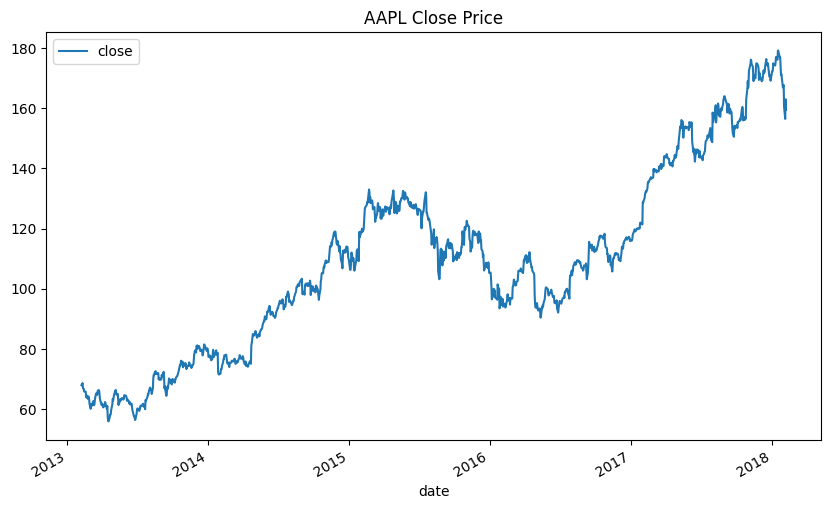

In [17]:
AAPL_Close.plot(x='date', y='close', title='AAPL Close Price', figsize=(10, 6))

In [18]:
print(f"Earliest date: {AAPL_Close['date'].min()}")
print(f"Latest date: {AAPL_Close['date'].max()}")

Earliest date: 2013-02-08 00:00:00
Latest date: 2018-02-07 00:00:00


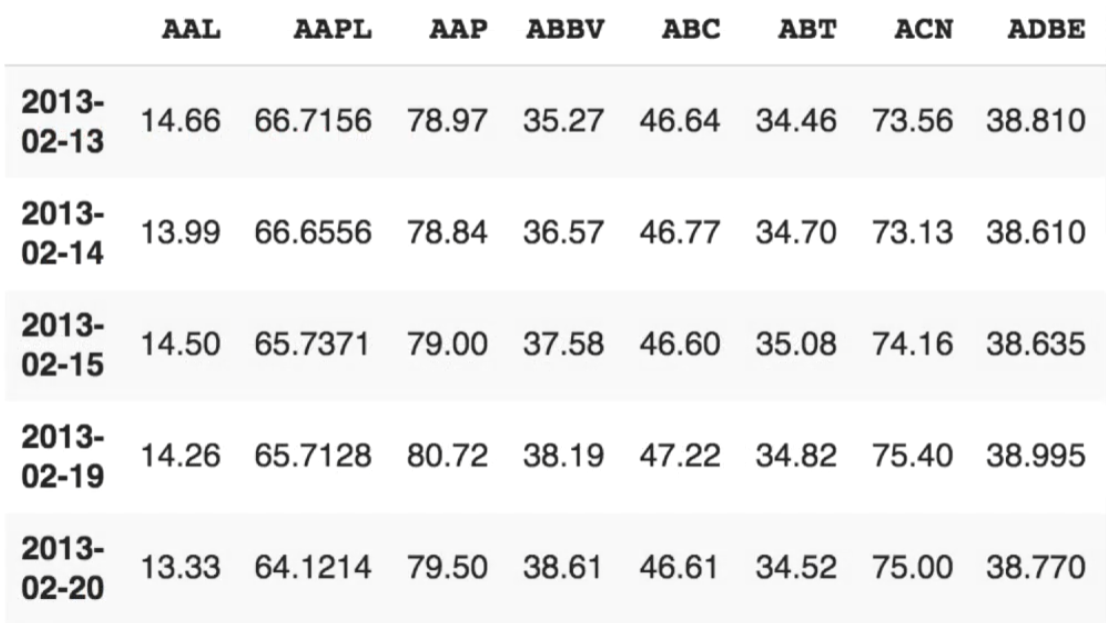

In [19]:
Image("../1. Images/Financial Basics - 1.png", width = 500, height = 500)

In [20]:
df_sp500.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL


In [21]:
# Start with an empty dataframe with dates as the index. We want to use the min and the max date from df_sp500 to set the date range.
dates = pd.date_range(start=df_sp500['date'].min(), end=df_sp500['date'].max())
df_closePrices = pd.DataFrame(index=dates)
df_closePrices.index = pd.to_datetime(df_closePrices.index.date)
df_closePrices.index.name = 'Date'
df_closePrices.head()

""
Date
2013-02-08
2013-02-09
2013-02-10
2013-02-11
2013-02-12


In [22]:
df_closePrices.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1826 entries, 2013-02-08 to 2018-02-07
Empty DataFrame


In [23]:
symbols = df_sp500['Name'].unique()
symbols[:5]

array(['AAL', 'AAPL', 'AAP', 'ABBV', 'ABC'], dtype=object)

In [24]:
for s in symbols:
    df_temp = df_sp500.loc[df_sp500['Name'] == s, ['date', 'close']].copy()
    df_temp.set_index('date', inplace=True)
    df_temp.rename(columns={'close': s}, inplace=True)
    df_closePrices = df_closePrices.join(df_temp)

df_closePrices.tail()

,AAL,AAPL,AAP,ABBV,ABC,ABT,ACN,ADBE,ADI,ADM,...,XLNX,XL,XOM,XRAY,XRX,XYL,YUM,ZBH,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2018-02-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-05,49.76,156.49,109.86,109.51,91.90,58.73,151.83,190.27,85.40,40.60,...,66.97,37.68,79.72,58.54,31.38,72.66,79.80,123.18,51.65,73.83
2018-02-06,51.18,163.03,112.20,111.20,91.54,58.86,154.69,194.47,88.54,42.00,...,68.99,37.34,78.35,58.46,30.85,71.33,80.58,122.30,52.52,73.27
2018-02-07,51.40,159.54,109.93,113.62,94.22,58.67,155.15,192.34,85.35,42.19,...,66.97,42.00,76.94,58.30,31.18,71.79,80.13,120.78,54.02,73.86


In [25]:
df_sp500.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 619040 entries, 0 to 619039
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   date    619040 non-null  datetime64[ns]
 1   open    619029 non-null  float64       
 2   high    619032 non-null  float64       
 3   low     619032 non-null  float64       
 4   close   619040 non-null  float64       
 5   volume  619040 non-null  int64         
 6   Name    619040 non-null  object        
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 33.1+ MB


In [26]:
# Now get rid of the NaN values where the stock was not traded
df_closePrices.dropna(axis=0, how='all', inplace=True)
df_closePrices.head()

,AAL,AAPL,AAP,ABBV,ABC,ABT,ACN,ADBE,ADI,ADM,...,XLNX,XL,XOM,XRAY,XRX,XYL,YUM,ZBH,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2013-02-08,14.75,67.8542,78.90,36.25,46.89,34.41,73.31,39.12,45.70,30.22,...,37.51,28.24,88.61,42.87,31.84,27.09,65.30,75.85,24.14,33.05
2013-02-11,14.46,68.5614,78.39,35.85,46.76,34.26,73.07,38.64,46.08,30.28,...,37.46,28.31,88.28,42.84,31.96,27.46,64.55,75.65,24.21,33.26
2013-02-12,14.27,66.8428,78.60,35.42,46.96,34.30,73.37,38.89,46.27,30.81,...,37.58,28.41,88.46,42.87,31.84,27.95,64.75,75.44,24.49,33.74
2013-02-13,14.66,66.7156,78.97,35.27,46.64,34.46,73.56,38.81,46.26,31.16,...,37.80,28.42,88.67,43.08,32.00,28.26,64.41,76.00,24.74,33.55
2013-02-14,13.99,66.6556,78.84,36.57,46.77,34.70,73.13,38.61,46.54,31.40,...,38.44,28.22,88.52,42.91,32.12,28.47,63.89,76.34,24.63,33.27


In [27]:
df_closePrices.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1259 entries, 2013-02-08 to 2018-02-07
Columns: 505 entries, AAL to ZTS
dtypes: float64(505)
memory usage: 4.9 MB


In [28]:
df_closePrices.to_csv('../0. Data/sp500_closePrices.csv')

<Axes: title={'center': 'IBM Close Price'}, xlabel='Date'>

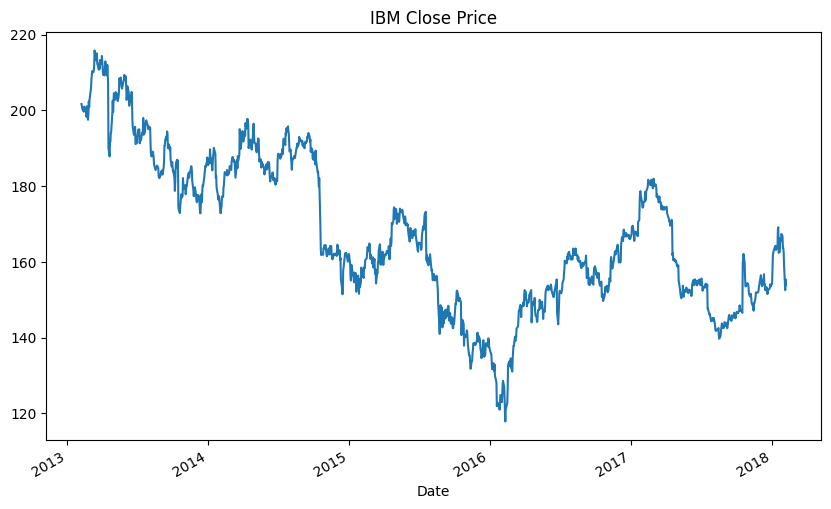

In [29]:
df_closePrices['IBM'].plot(title='IBM Close Price', figsize=(10, 6), x = 'Date', y = 'IBM')

<h3 style = 'color:green'>1.1.2 Dealing with Missing Data</h3>

Data goes missing for a variety of reasons:

1. Abrupt market events (e.g., stock splits, mergers, or stock layoffs)
2. Abruptly starts data on a certain date
3. Data missing inbetween - Company with low liquidity
4. Bad data entry or data processing errors

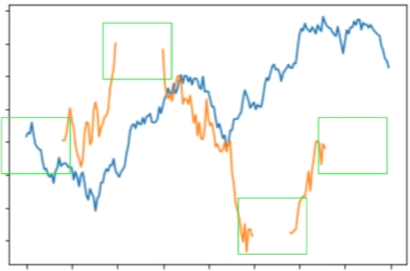

In [30]:
Image("../1. Images/Missing Data - 1.png", width = 500, height = 500)

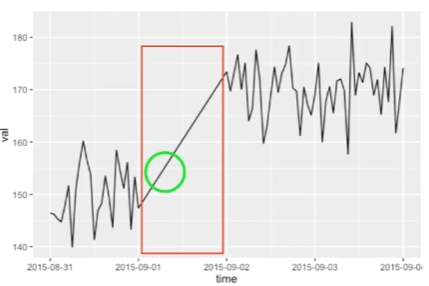

In [31]:
# Interpolation - Linearly fill missing values. This should not be done because in this case, we are using future data to predict past data.
Image("../1. Images/Missing Data - 2.png", width = 500, height = 500)

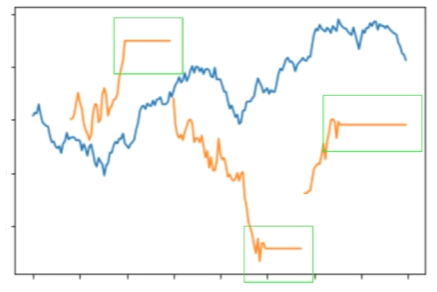

In [32]:
# Forward Filling - Fill missing values with the next available value. This is a common method.
Image("../1. Images/Missing Data - 3.png", width = 500, height = 500)

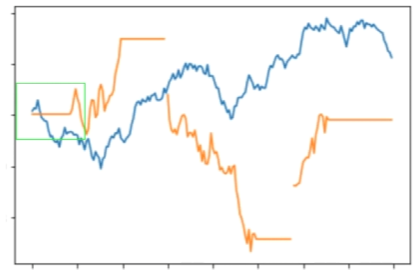

In [34]:
# Backward Filling - Fill missing values with the previous available value. This is also a common method.
# REMEMBER: Only Backward Fill after forward filling has been done to avoid data leakage.
Image("../1. Images/Missing Data - 4.png", width = 500, height = 500)

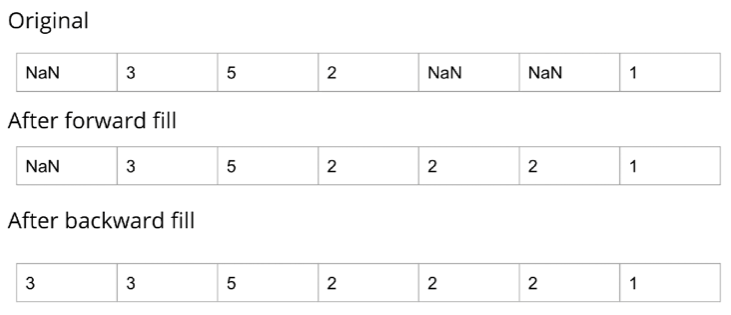

In [35]:
Image("../1. Images/Missing Data - 5.png", width = 500, height = 500)

<Axes: title={'center': 'IBM Close Price'}, xlabel='Date'>

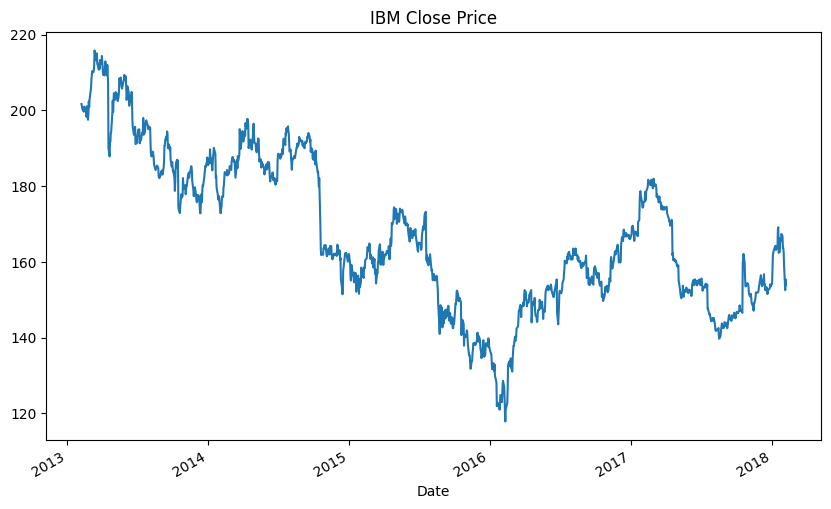

In [37]:
df_closePrices['IBM'].plot(title='IBM Close Price', figsize=(10, 6), x = 'Date', y = 'IBM')

In [39]:
df_closePrices.isna().sum().sum()

np.int64(16755)

In [40]:
df_closePrices.iloc[0,:].isna().sum() # How many stocks don't have data for the first day

np.int64(29)

In [41]:
df_closePrices.fillna(method='ffill', inplace=True)
df_closePrices.isna().sum().sum()

C:\Users\Owner\AppData\Local\Temp\ipykernel_37964\2564603993.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_closePrices.fillna(method='ffill', inplace=True)


np.int64(16704)

In [43]:
df_closePrices.fillna(method='bfill', inplace=True) # This will fill the missing values with the next available value. This is true for stocks that don't have data for the first day
df_closePrices.isna().sum().sum()

C:\Users\Owner\AppData\Local\Temp\ipykernel_37964\1019486384.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_closePrices.fillna(method='bfill', inplace=True) # This will fill the missing values with the next available value. This is true for stocks that don't have data for the first day


np.int64(0)

<Axes: xlabel='Date'>

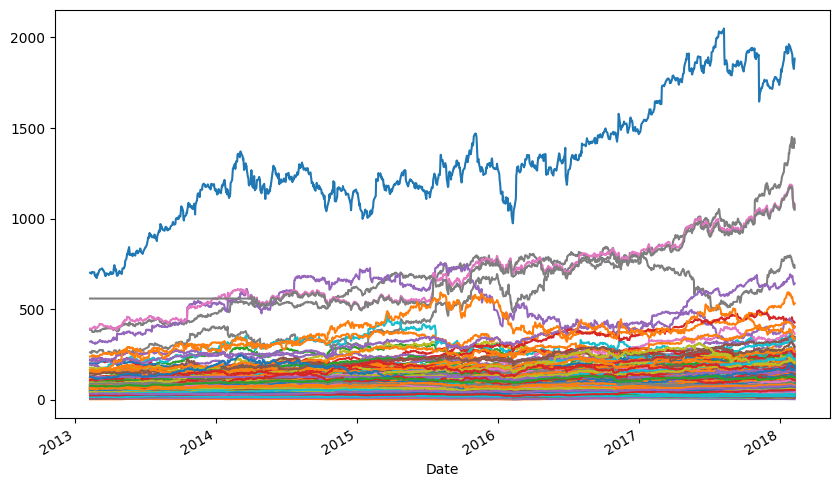

In [46]:
df_closePrices.plot(legend=False, figsize=(10, 6))

<Axes: xlabel='Date'>

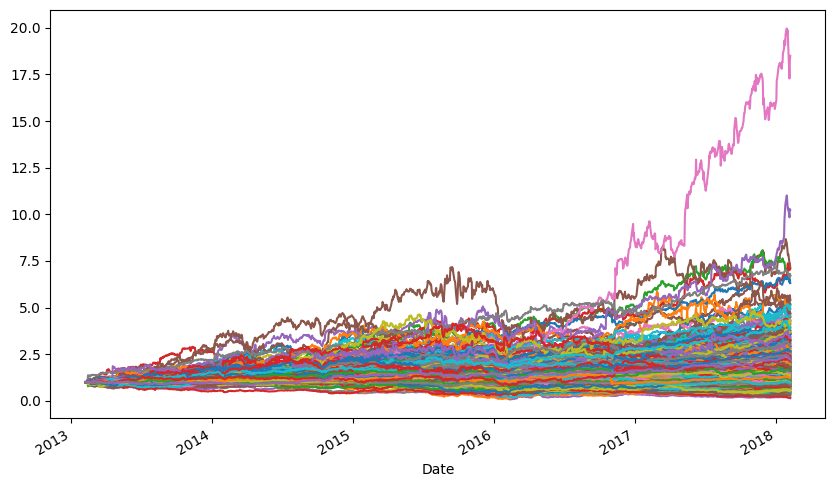

In [48]:
# Normalize stock prices by the first stock price in the dataset. This is done to make all stock prices comparable. It helps in comparing growth over time.
df_closePrices_normalized = df_closePrices / df_closePrices.iloc[0, :]
df_closePrices_normalized.plot(legend=False, figsize=(10, 6))

<h3 style = 'color:green'>1.1.3 Returns</h3>

Returns can be thought of as the percentage change.

This is calculated using the formula:

Return = (Closing Price - Opening Price) / Opening Price * 100

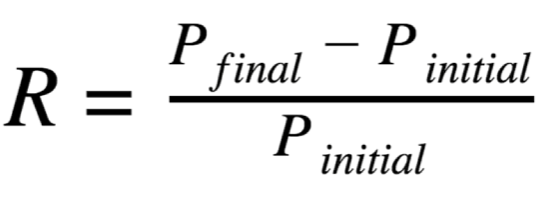

In [49]:
Image("../1. Images/Returns - 1.png", width = 500, height = 500)

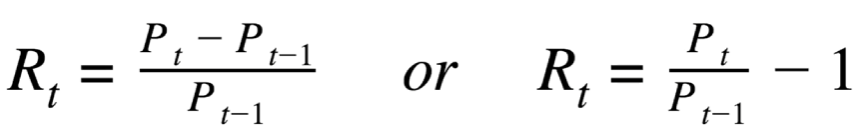

In [50]:
Image("../1. Images/Returns - 2.png", width = 500, height = 500)

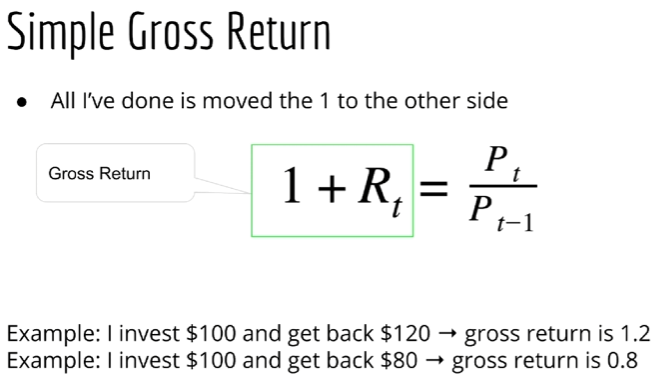

In [51]:
# Simple Gross Return
Image("../1. Images/Returns - 3.png", width = 500, height = 500)

<b>Log Returns</b>: Financial Engineers often use 'basis points (bps)' (1/100 of a percent or 1% of 1%) to express returns because they are more intuitive for investors. If you use regular numbers, you would see lots of zeros after the decimal point.

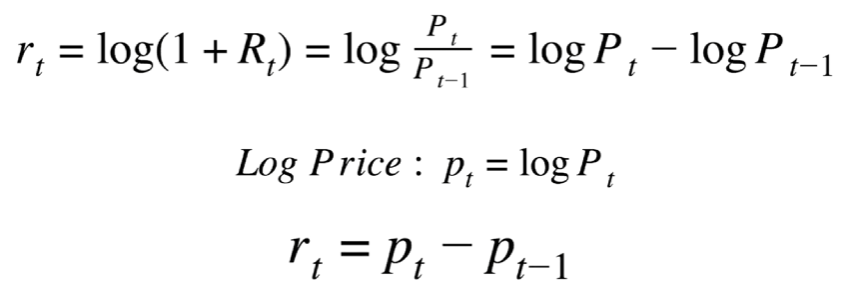

In [52]:
# Log Return - Continuously Compounded Returns
Image("../1. Images/Returns - 4.png", width = 500, height = 500)

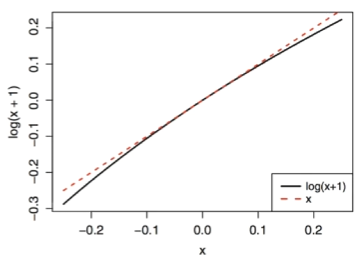

In [53]:
Image("../1. Images/Returns - 5.png", width = 500, height = 500)

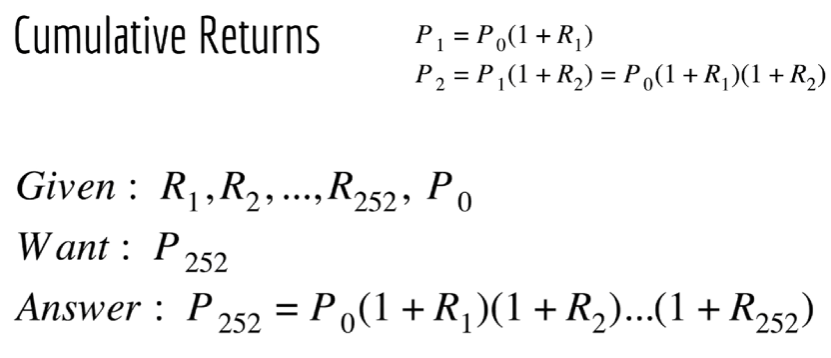

In [54]:
# Cumulative Returns
Image("../1. Images/Returns - 6.png", width = 500, height = 500)

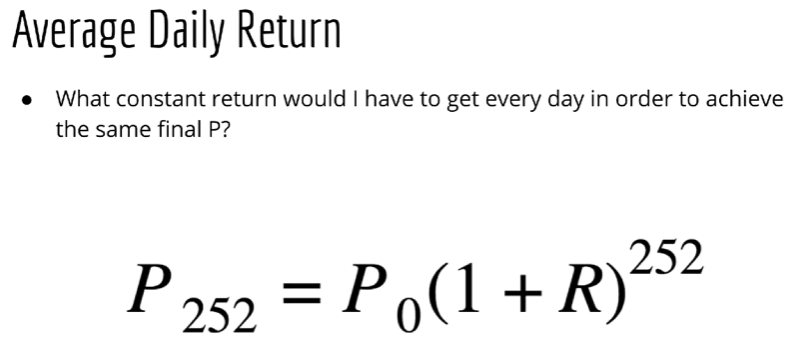

In [55]:
Image("../1. Images/Returns - 7.png", width = 500, height = 500)

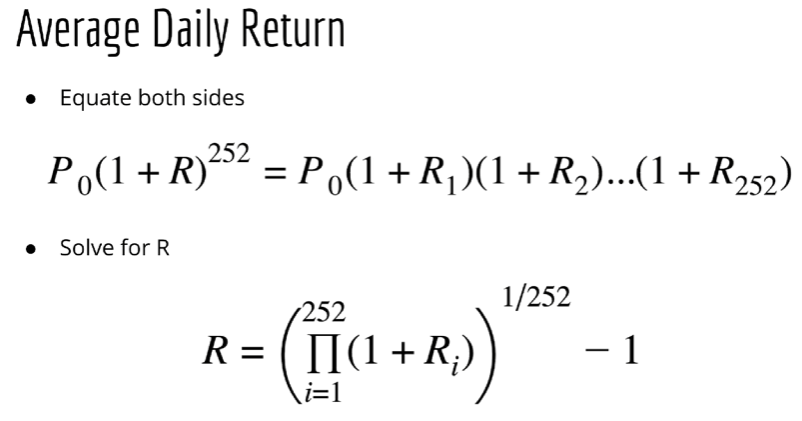

In [56]:
# 1 + R: Geometric Mean Return
Image("../1. Images/Returns - 8.png", width = 500, height = 500)

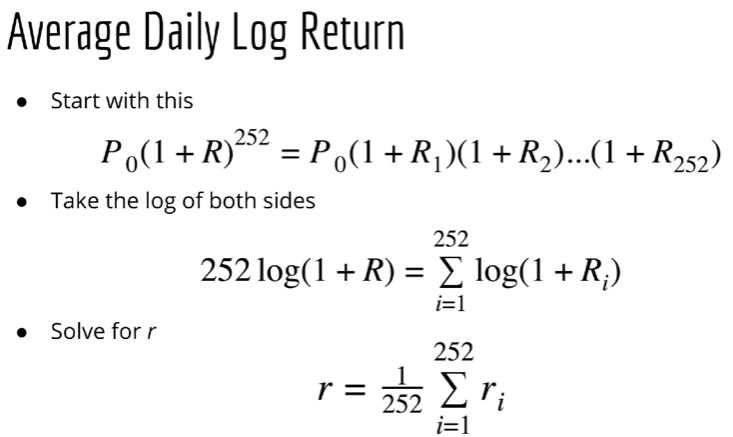

In [57]:
Image("../1. Images/Returns - 9.png", width = 500, height = 500)